In [4]:
import os
import re
from PIL import Image

datasetpath = r'C:\Users\CL-11\OneDrive\Research\OCTProject\RawDataQA (2)'

def extract_number(filename):
    match = re.search(r'\((\d+)\)', filename)
    return int(match.group(1)) if match else -1

images = sorted(
    [os.path.join(datasetpath, image) for image in os.listdir(datasetpath)],
    key=lambda x: extract_number(os.path.basename(x))
)

loaded_images = [Image.open(image) for image in images]

In [5]:
import numpy as np
from PIL import Image

# Convert loaded images to NumPy arrays
image_arrays = [np.array(image) for image in loaded_images]

# Stack the images into a 3D array (shape: num_images x height x width)
stacked_images = np.stack(image_arrays, axis=0)

# Compute the pixel-wise average across the stacked images
fused_image_array = np.mean(stacked_images, axis=0).astype(np.uint8)

# Convert the fused array back to an image
fused_image = Image.fromarray(fused_image_array)

# Save or display the fused image
fused_image.save(r'Fused_Image.tif')
#fused_image.show()


(-0.5, 511.5, 511.5, -0.5)

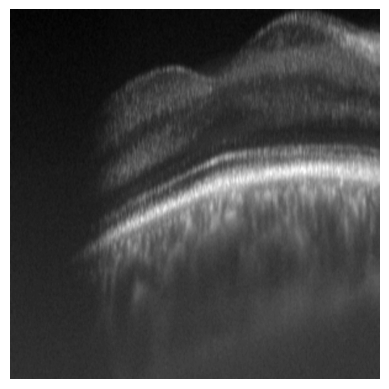

In [6]:
# display
import matplotlib.pyplot as plt
plt.imshow(fused_image_array, cmap='gray')
plt.axis('off')